**Котляков, Парамонов, Бровцин**

### 100,000 UK Used Car Data set
https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes


1. Выбрать набор данных для своей группы: <br>
    3530203_70101: Audi <br>
    3530203_70102: BMW <br>
    3530903_70301: Ford <br>
    **3530903_70302: Mercedes**<br>
    
2. Разбить данные на тренировочные и тестовые (70% на 30%, random_state=10).
3. Попытаться обучить регрессии c лучшим качеством. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import seaborn as sns

np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()


In [2]:
#получаем данные из файла, столбец цен, ставим на первое место для наглядномсти
auto_data = pd.read_csv("merc.csv")
auto_data = auto_data.reindex(columns=['price', 'model', 'year', 'transmission','mileage', 'fuelType','tax', 'mpg','engineSize'])
auto_data

,price,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,5200,SLK,2005,Automatic,63000,Petrol,325,32.1,1.8
1,34948,S Class,2017,Automatic,27000,Hybrid,20,61.4,2.1
2,49948,SL CLASS,2016,Automatic,6200,Petrol,555,28.0,5.5
3,61948,G Class,2016,Automatic,16000,Petrol,325,30.4,4.0
4,73948,G Class,2016,Automatic,4000,Petrol,325,30.1,4.0
...,...,...,...,...,...,...,...,...,...
13114,35999,C Class,2020,Automatic,500,Diesel,145,55.4,2.0
13115,24699,B Class,2020,Automatic,2500,Diesel,145,55.4,2.0
13116,30999,GLC Class,2019,Automatic,11612,Diesel,145,41.5,2.1
13117,37990,CLS Class,2019,Automatic,2426,Diesel,145,45.6,2.0


In [3]:
#получим представление о том, в каком диапазоне находятся данные
auto_data.describe()

,price,year,mileage,tax,mpg,engineSize
count,13119.000,13119.000,13119.000,13119.000,13119.000,13119.000
mean,24698.597,2017.296,21949.559,129.972,55.156,2.072
std,11842.676,2.225,21176.512,65.260,15.220,0.572
min,650.000,1970.000,1.000,0.000,1.100,0.000
25%,17450.000,2016.000,6097.500,125.000,45.600,1.800
50%,22480.000,2018.000,15189.000,145.000,56.500,2.000
75%,28980.000,2019.000,31779.500,145.000,64.200,2.100
max,159999.000,2020.000,259000.000,580.000,217.300,6.200


In [4]:
#в наборе данных присутствуют номинальные величины, такие как тип коробки передач, тип топлива, модель
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         13119 non-null  int64  
 1   model         13119 non-null  object 
 2   year          13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 768.8+ KB


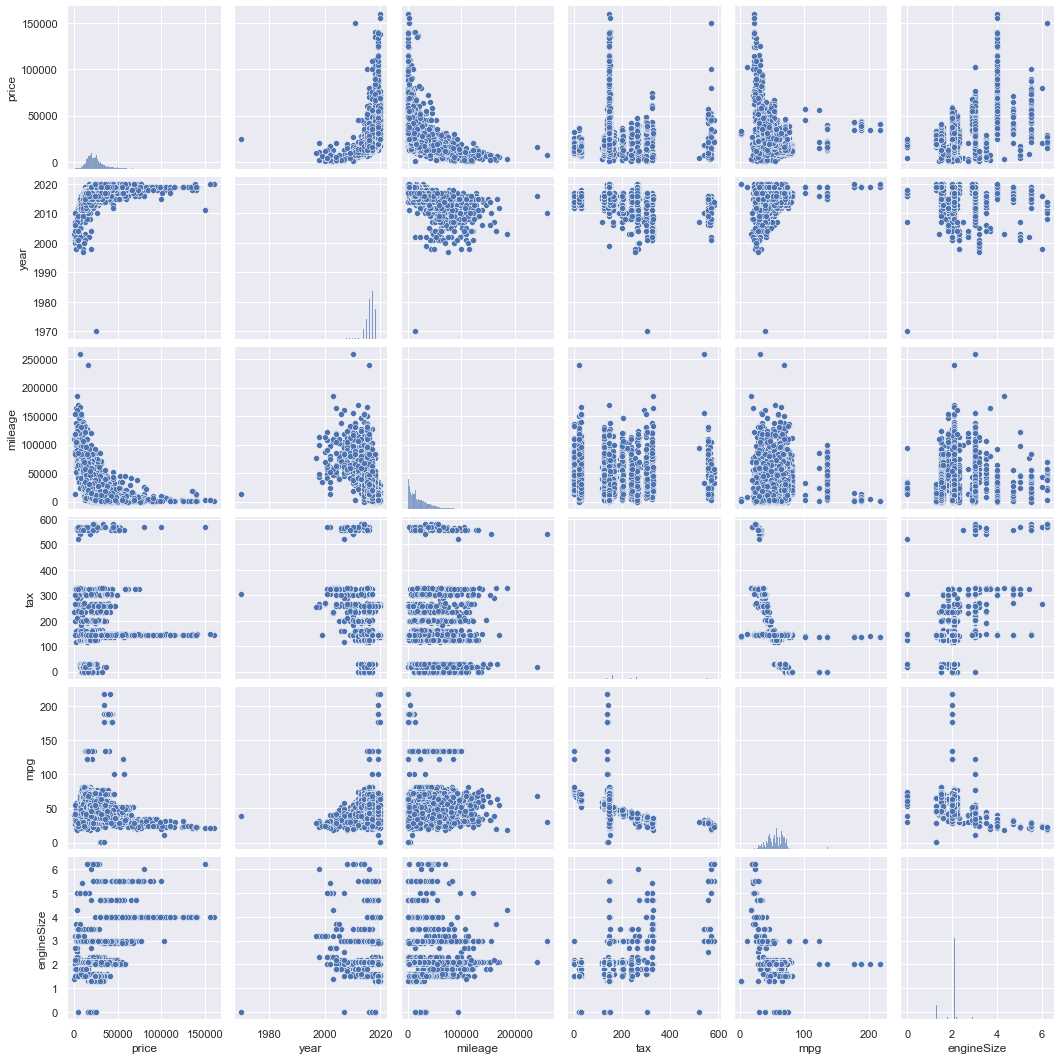

In [5]:
sns.pairplot(auto_data)

<AxesSubplot:>

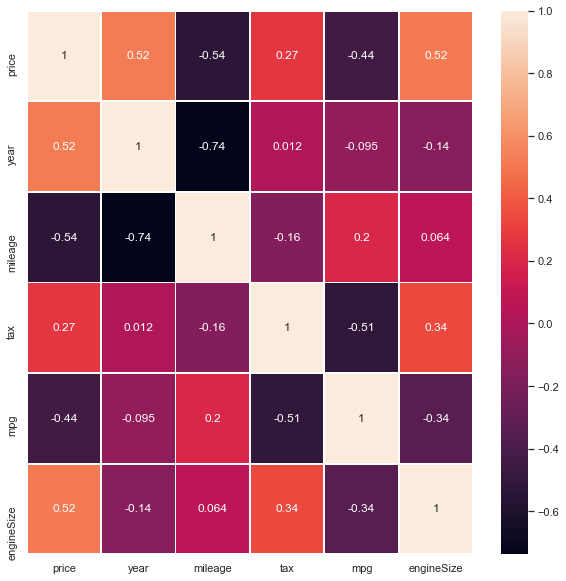

In [6]:
#определим корелляцию между колонками, имеющими числовой тип данных (целочисленные значения, и числа с плавающей точкой)
plt.subplots(figsize=(10,10))
corr_matrix = auto_data.corr(method='pearson')
sns.heatmap(corr_matrix, annot=True,linewidths=0.7, annot_kws={"size":12})

In [7]:
#при построении линейной регрессии мы можем пойти двумя путями: номинальные величины 
#преобразовать в dummie столбцы, имеющие значения 0 или 1
#второй путь: номинальные величины перобразовать в числовые значения от 0 до n-1, где n - количество уникальных значений в столбце
#тут пойдём по первому пути:
auto_data_dummies = pd.get_dummies(auto_data)
auto_data_dummies

,price,year,mileage,tax,mpg,engineSize,model_ A Class,model_ B Class,model_ C Class,model_ CL Class,...,model_220,model_230,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,5200,2005,63000,325,32.1,1.8,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,34948,2017,27000,20,61.4,2.1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,49948,2016,6200,555,28.0,5.5,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,61948,2016,16000,325,30.4,4.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,73948,2016,4000,325,30.1,4.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13114,35999,2020,500,145,55.4,2.0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
13115,24699,2020,2500,145,55.4,2.0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
13116,30999,2019,11612,145,41.5,2.1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
13117,37990,2019,2426,145,45.6,2.0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [8]:
#а тут по второму:
object_cols = auto_data.columns[auto_data.dtypes == 'object']
le = LabelEncoder()
for col in object_cols:
    auto_data[col] = le.fit_transform(auto_data[col])
auto_data

,price,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,5200,20,2005,0,63000,3,325,32.1,1.8
1,34948,18,2017,0,27000,1,20,61.4,2.1
2,49948,19,2016,0,6200,3,555,28.0,5.5
3,61948,9,2016,0,16000,3,325,30.4,4.0
4,73948,9,2016,0,4000,3,325,30.1,4.0
...,...,...,...,...,...,...,...,...,...
13114,35999,2,2020,0,500,0,145,55.4,2.0
13115,24699,1,2020,0,2500,0,145,55.4,2.0
13116,30999,13,2019,0,11612,0,145,41.5,2.1
13117,37990,7,2019,0,2426,0,145,45.6,2.0


In [9]:
#разделим данные на признаки и ответы
X, Y = auto_data.drop(['price'], axis=1), auto_data['price']
#разделим данные на тренировочные и тестовые
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [10]:
#аналогично поступим с датафреймом, где был использован подход с dummies
X, Y = auto_data_dummies.drop(['price'], axis=1), auto_data_dummies['price']
X_train_dummies, X_test_dummies, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

In [11]:
#стандартизируем данные
std_scaler = StandardScaler()
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)
X_train_dummies_scaled = std_scaler.fit_transform(X_train_dummies)
X_test_dummies_scaled = std_scaler.transform(X_test_dummies)

# **LinearRegression**

In [12]:
lr = LinearRegression()
lr.fit(X_train_scaled, Y_train)
lr_predictions = lr.predict(X_test_scaled)
lr_rmse = metrics.mean_squared_error(Y_test, lr_predictions, squared=False) #Измерение ошибки
print(f'RMSE = {round(lr_rmse, 3)}')

RMSE = 6755.127


Text(0, 0.5, 'Actual')

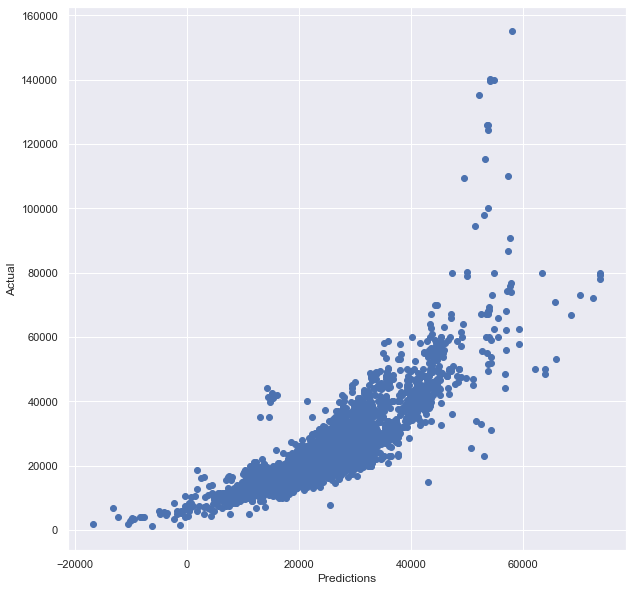

In [13]:
plt.figure(figsize=(10,10))
plt.scatter(lr_predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')

In [14]:
#веса признаков 
pd.DataFrame(lr.coef_, auto_data.columns[1:], columns=['Coefficients'])

,Coefficients
model,1617.146
year,4546.067
transmission,93.085
mileage,-2962.160
fuelType,806.008
tax,-961.454
mpg,-1788.561
engineSize,5855.014


In [15]:
#коэффициент детерминации (1-доля дисперсии ошибки модели в дисперсии зависимой переменной, т.е. чем он ближе к 1, тем точнее модель)
lr.score(X_test_scaled, Y_test)

0.6998149315816915

**подход с dummies**

In [16]:
lr = LinearRegression()
lr.fit(X_train_dummies_scaled, Y_train)
lr_predictions = lr.predict(X_test_dummies_scaled)
lr_rmse = metrics.mean_squared_error(Y_test, lr_predictions, squared=False) #Измерение ошибки
print(f'RMSE = {round(lr_rmse, 3)}')

RMSE = 735128352843176.1


Text(0, 0.5, 'Actual')

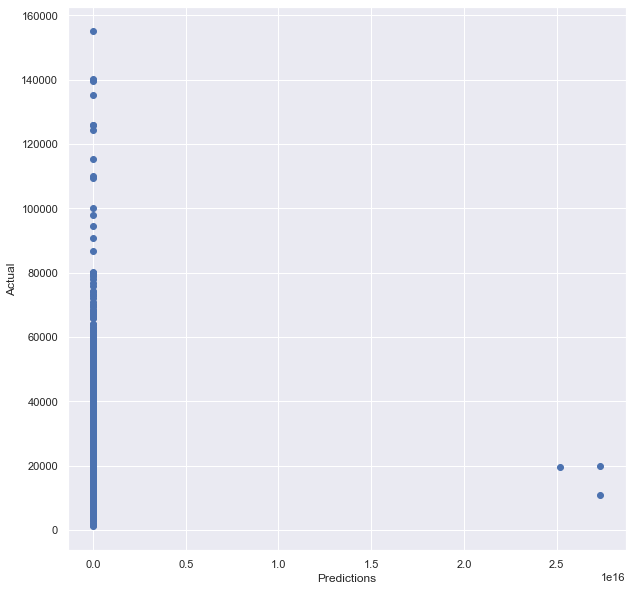

In [17]:
plt.figure(figsize=(10,10))
plt.scatter(lr_predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')

In [18]:
pd.DataFrame(lr.coef_, auto_data_dummies.columns[1:], columns=['Coefficients'])

,Coefficients
year,4.223e+03
mileage,-3.043e+03
tax,-1.322e+03
mpg,-2.650e+03
engineSize,4.923e+03
model_ A Class,-1.070e+16
model_ B Class,-5.653e+15
model_ C Class,-1.221e+16
model_ CL Class,-5.280e+15
model_ CLA Class,-2.234e+15


In [19]:
lr.score(X_test_dummies_scaled, Y_test)

-3.5550719356485024e+21

# **Lasso**

In [20]:
lsso = Lasso(random_state=10, max_iter=10000)
lsso.fit(X_train_scaled, Y_train)
lsso_predictions = lsso.predict(X_test_scaled)
lsso_rmse = metrics.mean_squared_error(Y_test, lsso_predictions, squared=False) #Измерение ошибки
print(f'RMSE = {round(lsso_rmse, 3)}')

RMSE = 6755.352


Text(0, 0.5, 'Actual')

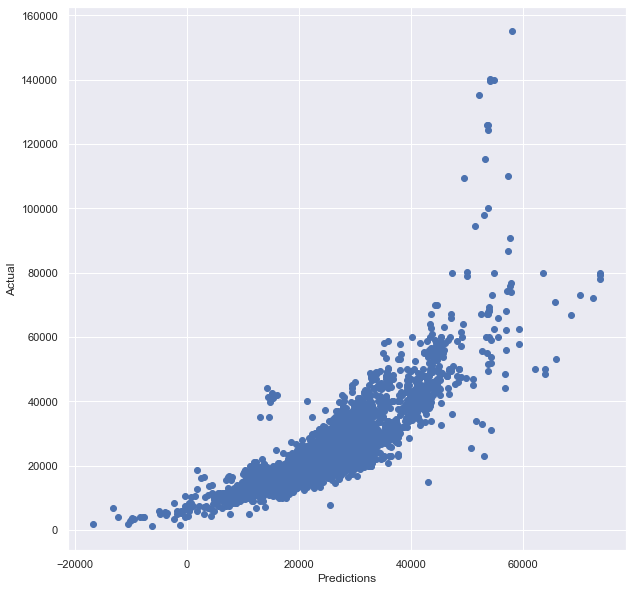

In [21]:
plt.figure(figsize=(10,10))
plt.scatter(lsso_predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')

In [22]:
pd.DataFrame(lsso.coef_, auto_data.columns[1:], columns=['Coefficients'])

,Coefficients
model,1615.888
year,4545.900
transmission,92.344
mileage,-2961.360
fuelType,804.578
tax,-958.680
mpg,-1787.824
engineSize,5853.688


In [23]:
lsso.score(X_test_scaled, Y_test)

0.6997949772783802

**подход с dummies**

In [24]:
lsso = Lasso(random_state=10, max_iter=10000)
lsso.fit(X_train_dummies_scaled, Y_train)
lsso_predictions = lsso.predict(X_test_dummies_scaled)
lsso_rmse = metrics.mean_squared_error(Y_test, lsso_predictions, squared=False) #Измерение ошибки
print(f'RMSE = {round(lsso_rmse, 3)}')

RMSE = 6007.406


Text(0, 0.5, 'Actual')

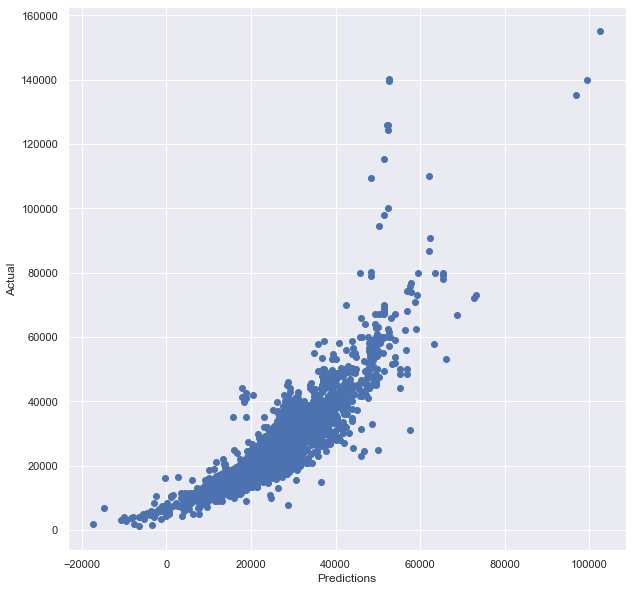

In [25]:
plt.figure(figsize=(10,10))
plt.scatter(lsso_predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')

In [26]:
pd.DataFrame(lsso.coef_, auto_data_dummies.columns[1:], columns=['Coefficients'])

,Coefficients
year,4225.090
mileage,-3030.654
tax,-1297.527
mpg,-2642.534
engineSize,4906.110
model_ A Class,-0.000
model_ B Class,-491.445
model_ C Class,-69.494
model_ CL Class,-127.221
model_ CLA Class,-14.160


In [27]:
lsso.score(X_test_dummies_scaled, Y_test)

0.7625916020133665

# **Ridge**

In [28]:
ridge = Ridge()
ridge.fit(X_train_scaled, Y_train)
ridge_predictions = ridge.predict(X_test_scaled)
ridge_rmse = metrics.mean_squared_error(Y_test, ridge_predictions, squared=False) #Измерение ошибки
print(f'RMSE = {round(ridge_rmse, 3)}')

RMSE = 6755.256


Text(0, 0.5, 'Actual')

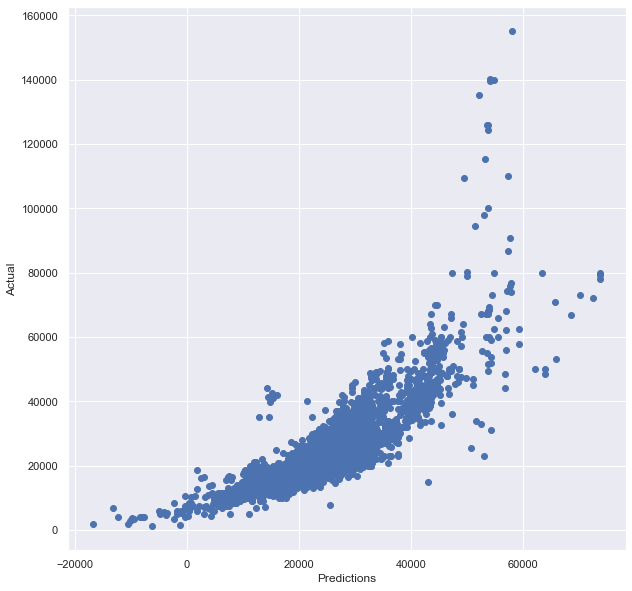

In [29]:
plt.figure(figsize=(10,10))
plt.scatter(ridge_predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')

In [30]:
pd.DataFrame(ridge.coef_, auto_data.columns[1:], columns=['Coefficients'])

,Coefficients
model,1617.168
year,4545.405
transmission,93.200
mileage,-2962.191
fuelType,805.834
tax,-960.993
mpg,-1788.563
engineSize,5854.104


In [31]:
ridge.score(X_test_scaled, Y_test)

0.6998034880322792

**подход с dummies**

In [32]:
ridge = Ridge()
ridge.fit(X_train_dummies_scaled, Y_train)
ridge_predictions = ridge.predict(X_test_dummies_scaled)
ridge_rmse = metrics.mean_squared_error(Y_test, ridge_predictions, squared=False) #Измерение ошибки
print(f'RMSE = {round(ridge_rmse, 3)}')

RMSE = 6007.52


Text(0, 0.5, 'Actual')

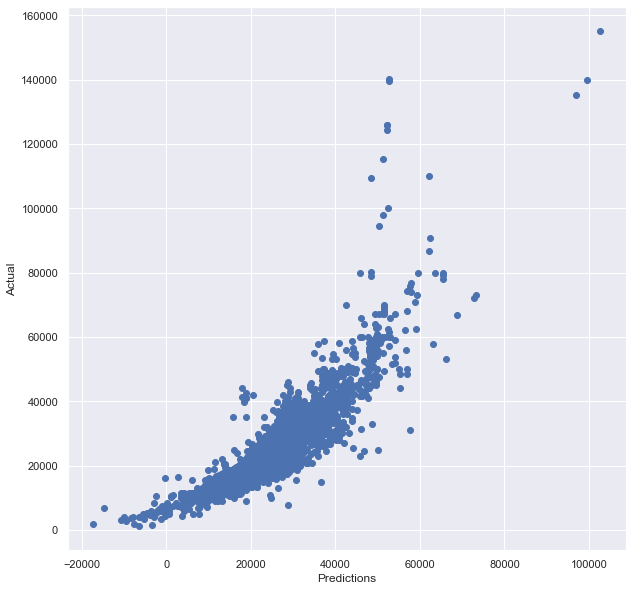

In [33]:
plt.figure(figsize=(10,10))
plt.scatter(ridge_predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')

In [34]:
pd.DataFrame(ridge.coef_, auto_data_dummies.columns[1:], columns=['Coefficients'])

,Coefficients
year,4225.661
mileage,-3031.141
tax,-1301.027
mpg,-2643.649
engineSize,4905.402
model_ A Class,-448.459
model_ B Class,-728.840
model_ C Class,-580.992
model_ CL Class,-349.063
model_ CLA Class,-108.589


In [35]:
ridge.score(X_test_dummies_scaled, Y_test)

0.7625826191636019

# RidgeCV

In [36]:
ridge_cv = RidgeCV()
ridge_cv.fit(X_train_scaled, Y_train)
ridge_cv_predictions = ridge_cv.predict(X_test_scaled)
ridge_cv_rmse = metrics.mean_squared_error(Y_test, ridge_cv_predictions, squared=False) #Измерение ошибки
print(f'RMSE = {round(ridge_cv_rmse, 3)}')

RMSE = 6756.418


Text(0, 0.5, 'Actual')

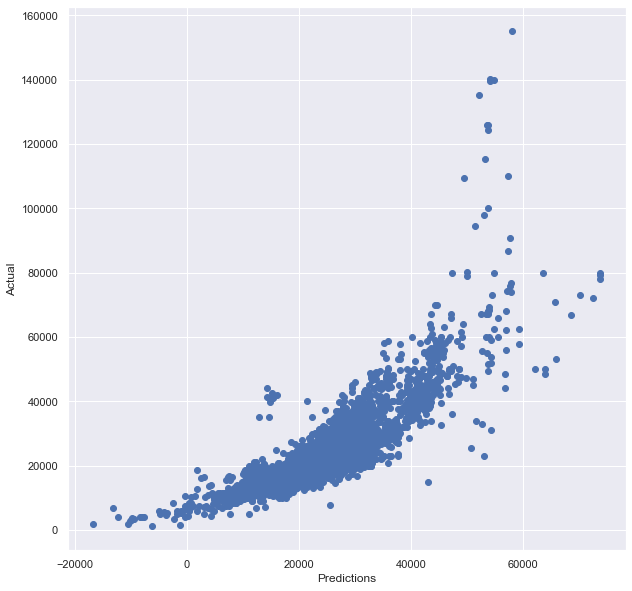

In [37]:
plt.figure(figsize=(10,10))
plt.scatter(ridge_cv_predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')

In [38]:
pd.DataFrame(ridge_cv.coef_, auto_data.columns[1:], columns=['Coefficients'])

,Coefficients
model,1617.361
year,4539.459
transmission,94.230
mileage,-2962.458
fuelType,804.271
tax,-956.859
mpg,-1788.573
engineSize,5845.932


In [39]:
ridge_cv.score(X_test_scaled, Y_test)

0.6997001433806238

**подход с dummies**

In [40]:
ridge_cv = RidgeCV()
ridge_cv.fit(X_train_dummies_scaled, Y_train)
ridge_cv_predictions = ridge_cv.predict(X_test_dummies_scaled)
ridge_cv_rmse = metrics.mean_squared_error(Y_test, ridge_cv_predictions, squared=False) #Измерение ошибки
print(f'RMSE = {round(ridge_cv_rmse, 3)}')

RMSE = 6008.78


Text(0, 0.5, 'Actual')

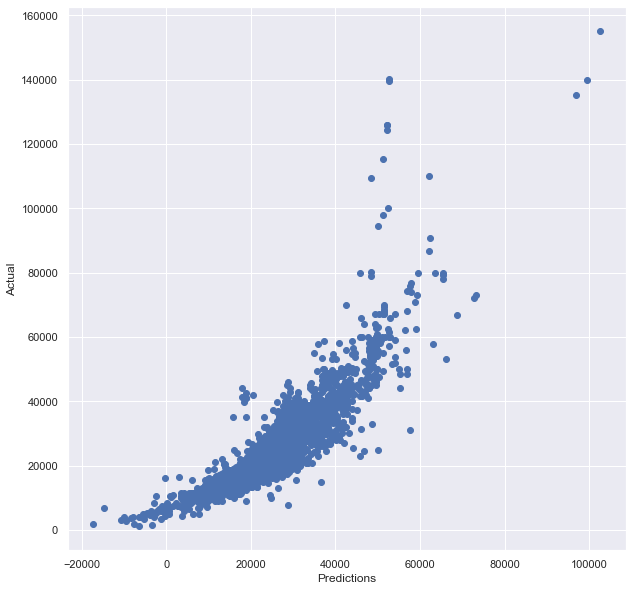

In [41]:
plt.figure(figsize=(10,10))
plt.scatter(ridge_cv_predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')

In [42]:
pd.DataFrame(ridge_cv.coef_, auto_data_dummies.columns[1:], columns=['Coefficients'])

,Coefficients
year,4219.738
mileage,-3030.592
tax,-1295.471
mpg,-2637.547
engineSize,4898.829
model_ A Class,-450.075
model_ B Class,-728.969
model_ C Class,-580.537
model_ CL Class,-348.968
model_ CLA Class,-108.549


In [43]:
ridge_cv.score(X_test_dummies_scaled, Y_test)

0.7624830307814116

# **LassoCV**

In [44]:
lsso_cv = LassoCV()
lsso_cv.fit(X_train_scaled, Y_train)
lsso_cv_predictions = lsso_cv.predict(X_test_scaled)
lsso_cv_rmse = metrics.mean_squared_error(Y_test, lsso_cv_predictions, squared=False) #Измерение ошибки
print(f'RMSE = {round(lsso_cv_rmse, 3)}')

RMSE = 6757.797


Text(0, 0.5, 'Actual')

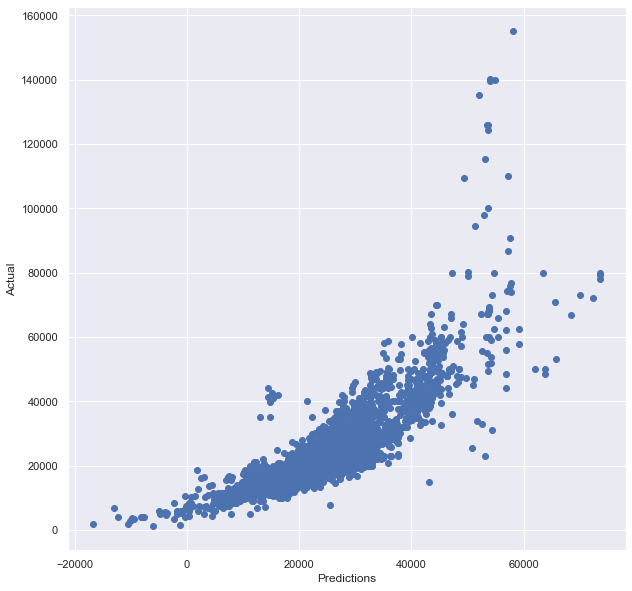

In [45]:
plt.figure(figsize=(10,10))
plt.scatter(lsso_cv_predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')

In [46]:
pd.DataFrame(lsso_cv.coef_, auto_data.columns[1:], columns=['Coefficients'])

,Coefficients
model,1603.135
year,4541.767
transmission,84.722
mileage,-2955.304
fuelType,790.125
tax,-931.315
mpg,-1780.611
engineSize,5840.305


In [47]:
lsso_cv.score(X_test_scaled, Y_test)

0.6995775704398803

**подход с dummies**

In [48]:
lsso_cv = LassoCV()
lsso_cv.fit(X_train_dummies_scaled, Y_train)
lsso_cv_predictions = lsso_cv.predict(X_test_dummies_scaled)
lsso_cv_rmse = metrics.mean_squared_error(Y_test, lsso_cv_predictions, squared=False) #Измерение ошибки
print(f'RMSE = {round(lsso_cv_rmse, 3)}')

RMSE = 6009.999


Text(0, 0.5, 'Actual')

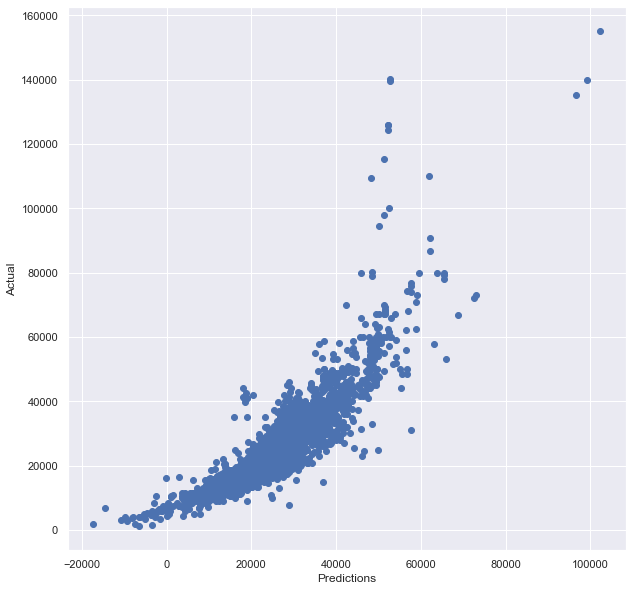

In [49]:
plt.figure(figsize=(10,10))
plt.scatter(lsso_cv_predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')

In [50]:
pd.DataFrame(lsso_cv.coef_, auto_data_dummies.columns[1:], columns=['Coefficients'])

,Coefficients
year,4215.335
mileage,-3026.348
tax,-1264.865
mpg,-2628.130
engineSize,4905.681
model_ A Class,-0.000
model_ B Class,-486.338
model_ C Class,-66.989
model_ CL Class,-121.247
model_ CLA Class,-7.061


In [51]:
lsso_cv.score(X_test_dummies_scaled, Y_test)

0.7623866335569219

**LassoCV + alphas**

In [52]:
alphas = np.linspace(1, 10, 100)
lsso_cv = LassoCV(alphas=alphas)
lsso_cv.fit(X_train_scaled, Y_train)
lsso_cv_predictions = lsso_cv.predict(X_test_scaled)
lsso_cv_rmse = metrics.mean_squared_error(Y_test, lsso_cv_predictions, squared=False) #Измерение ошибки
print(f'RMSE = {round(lsso_cv_rmse, 3)}')

RMSE = 6757.381


**подход с dummies**

In [53]:
alphas = np.linspace(1, 10, 100)
lsso_cv = LassoCV(alphas=alphas)
lsso_cv.fit(X_train_dummies_scaled, Y_train)
lsso_cv_predictions = lsso_cv.predict(X_test_dummies_scaled)
lsso_cv_rmse = metrics.mean_squared_error(Y_test, lsso_cv_predictions, squared=False) #Измерение ошибки
print(f'RMSE = {round(lsso_cv_rmse, 3)}')

RMSE = 6010.176


# **RandomForestRegressor**

In [54]:
rfr = RandomForestRegressor(random_state = 10, n_estimators = 100)
rfr.fit(X_train_scaled, Y_train)
rfr_predictions = rfr.predict(X_test_scaled)
rfr_rmse = metrics.mean_squared_error(Y_test, rfr_predictions, squared=False) #Измерение ошибки
print(f'RMSE = {round(rfr_rmse, 3)}')

RMSE = 2638.454


Text(0, 0.5, 'Actual')

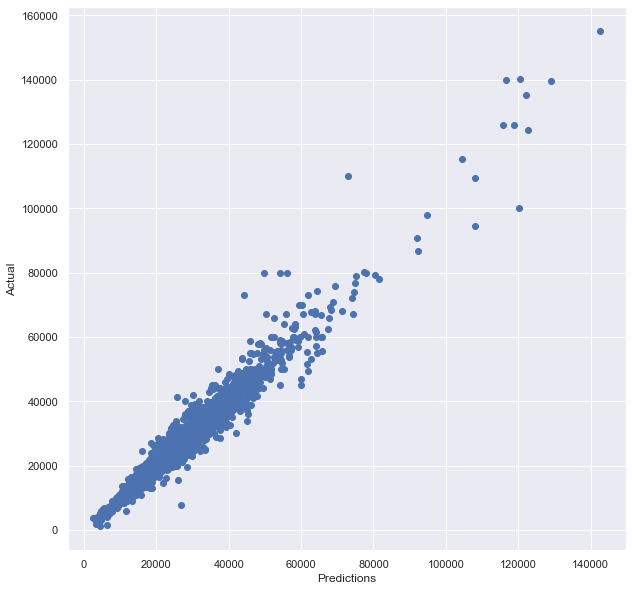

In [55]:
plt.figure(figsize=(10,10))
plt.scatter(rfr_predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')

In [56]:
pd.DataFrame(rfr.feature_importances_, auto_data.columns[1:], columns=['Coefficients'])

,Coefficients
model,0.108
year,0.110
transmission,0.004
mileage,0.304
fuelType,0.003
tax,0.020
mpg,0.156
engineSize,0.295


In [57]:
rfr.score(X_test_scaled, Y_test)

0.9542046779241014

**подход с dummies**

In [59]:
rfr = RandomForestRegressor(random_state = 10, n_estimators = 100)
rfr.fit(X_train_dummies_scaled, Y_train)
rfr_predictions = rfr.predict(X_test_dummies_scaled)
rfr_rmse = metrics.mean_squared_error(Y_test, rfr_predictions, squared=False) #Измерение ошибки
print(f'RMSE = {round(rfr_rmse, 3)}')

RMSE = 2593.636


Text(0, 0.5, 'Actual')

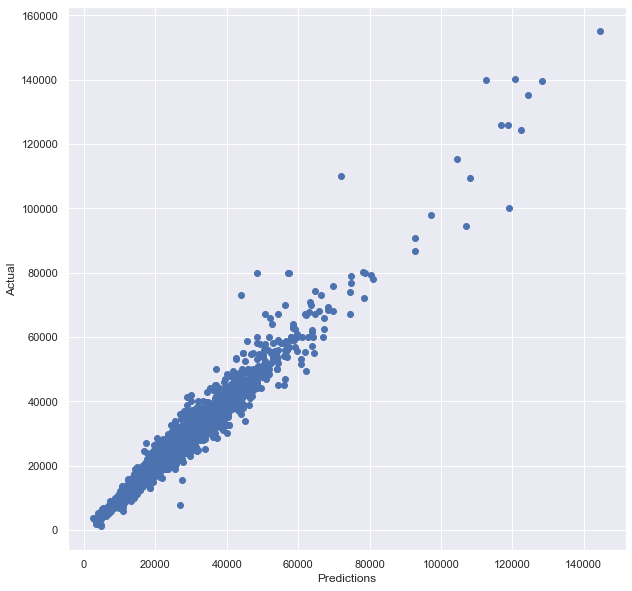

In [60]:
plt.figure(figsize=(10,10))
plt.scatter(rfr_predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')

In [61]:
pd.DataFrame(rfr.feature_importances_, auto_data_dummies.columns[1:], columns=['Coefficients'])

,Coefficients
year,1.084e-01
mileage,3.013e-01
tax,1.991e-02
mpg,1.602e-01
engineSize,3.088e-01
model_ A Class,1.822e-02
model_ B Class,3.038e-03
model_ C Class,4.548e-03
model_ CL Class,7.876e-04
model_ CLA Class,1.836e-04


In [62]:
rfr.score(X_test_dummies_scaled, Y_test)

0.955747262873424

# **Выводы**

Лучшие результаты показал метод случайного леса, на это указывают как RMSE, так и коэффициент детерминации. Методы LinearRegression, Lasso, LassoCV, Ridge, RidgeCV показали фактически идентичные результаты, однако стоит заметить, что при использовании подхода преобразования номинальных величин в dummie массивы, точность Lasso, LassoCV, Ridge, RidgeCV увеличивается, что нельзя сказать о LinearRegression. Метод RandomForestRegressor при обоих подходах показал схожие друг между другом результаты.
